
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Refresher Course on Matrix Analysis and Optimization</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> <a href="https://ljk.imag.fr/membres/Jerome.Malick/" style="font-size: 16px; font-weight: bold">Jérôme Malick</a><br/> 2017/2018 </td>
</tr>
</table>


<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 2 - Refresher Course </a></center>

<br/>

# ``1. Matrix Analysis``

---

<a href="#style"><b>Package check and Styling</b></a><br/><br/><b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; a) <a href="#MALinReg"> Linear Systems Resolution with applications to Regression</a><br/>&nbsp;&nbsp;&nbsp; b) <a href="#MASVD"> Singular Value Decomposition and Image Compression</a><br/>&nbsp;&nbsp;&nbsp; c) <a href="#MAPG"> PageRank and the Power Method</a><br/>

## <a id="MALinReg"> a) Linear Systems Resolution with applications to Regression</a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



In this example, we use linear algebra to extract information from data; more precisely, we predict final notes of a group of student from their profiles with the [Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance) which includes secondary education students of two Portuguese schools.


Profiles include features such as student grades, demographic, social and school related features and were collected by using school reports and questionnaires. There are $m = 395$ students (examples) and we selected $n = 27$ features (see <tt>data/student.txt</tt> for the features description and <tt>datat/student-mat.csv</tt> for the csv dataset.)



Our goal is to predict a target feature (the $28$-th) which is the final grade of the student from the other features (the first $27$). We assume that the final grade can be explained by a linear combination of the other features. We are going to learn from this data using linear regression over the $m_{learn} = 300$ students (called the *learning set*). We will check our prediction by comparing the results for the other $m_{test} = 95$ students (the *testing set*).

In [1]:
import numpy as np

# File reading
dat_file = np.load('data/student.npz')
A_learn = dat_file['A_learn']
b_learn = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']

m = 395 # number of read examples (total:395)
n = 27 # features
m_learn = 300

Mathematically, from the $m_{learn} \times (n+1)$ *learning matrix* (the number of columns is $n+1$ as a column of ones, called *intercept* for statistical reasons). $A_{learn}$ comprising of the features values of each training student in line, and the vector of the values of the target features $b_{learn}$;  we seek a size-$n+1$ *regression vector* that minimizes the squared error between  $A_{learn} x$ and $b_{learn}$. This problem boils down to the following least square problem:
$$ \min_{x\in\mathbb{R}^{n+1}}  \|  A_{learn} x - b_{learn} \|_2^2 . $$

<div class="exo"> <b>Question 1:</b> Observe the rank of the $m_{learn} \times (n+1)$ matrix $A_{learn}$. Does it have full row rank? full column rank? Conclude about the existence and uniqueness of solutions of the problem.</div>

In [7]:
rank_A_learn = np.linalg.matrix_rank(A_learn) #.........................................
print('Rank of matrix A_learn ({:d} rows, {:d} cols.): {:d}\n'.format(m_learn,n+1,rank_A_learn))

Rank of matrix A_learn (300 rows, 28 cols.): 28



<div class="exo"> <b>Question 2:</b>Compute the solution of the minimization problem using the Singular Value Decomposition. <br/>* **hint:** use the option <tt>full_matrices=False</tt> of Numpy's SVD command to get the compact SVD.*</div>

In [8]:
np.linalg.lstsq?

In [24]:
x_reg = np.linalg.lstsq(A_learn,b_learn)[0]

U, s, Vt = np.linalg.svd(A_learn, full_matrices=False)
# print(U.shape, s.shape, Vt.shape)
A_pinv_svd  = np.matmul(np.matmul(Vt.T, np.diag(1 / s)), U.T)

x_reg_svd = np.matmul(A_pinv_svd, b_learn)
print('Solution by SVD: \t\t  distance to x_reg = {:n} '.format(np.linalg.norm(x_reg -  x_reg_svd)))

Solution by SVD: 		  distance to x_reg = 1.37769e-14 


<div class="exo"> <b>Question 3:</b> In order to test the goodness of our predictor <tt>x_reg</tt>, we use the rest of the data to compare our predictions with the actual observations. The test matrix $A_{test}$ has $m_{test} = 95$ rows (students) and $n+1 = 28$ columns (features+intercept). Construct the predicted grades from <tt>x_reg</tt> and compare with the actual observed grades in $b_{test}$ (set <tt>SHOW_PREDICTION = True</tt> in the code). </div>

In [27]:
predict = np.matmul(A_test, x_reg) #.........................................

# SHOW_PREDICTION = False
SHOW_PREDICTION = True

if SHOW_PREDICTION:
    print('\n\n  Predicted | True value')
    for i in range(predict.size):
        print('\t{:2d}     {:2d} '.format(int(predict[i]),int(b_test[i])))



  Predicted | True value
	10     11 
	10     10 
	12     14 
	17     18 
	13     13 
	11     12 
	19     18 
	 8      8 
	12     12 
	10     10 
	 8      0 
	11     13 
	11     11 
	10     11 
	12     13 
	11     11 
	 8      0 
	 9      9 
	10     10 
	10     11 
	14     13 
	 9      9 
	10     11 
	14     15 
	14     15 
	10     11 
	15     16 
	10     10 
	 9      9 
	14     14 
	 7      8 
	13     14 
	 0      0 
	 7      0 
	 8      0 
	15     15 
	14     13 
	 7      0 
	15     17 
	10     10 
	11     11 
	 9      0 
	15     15 
	 7      0 
	 9     10 
	13     14 
	15     16 
	 9      9 
	14     15 
	12     13 
	 6      8 
	13     13 
	 5      8 
	 7      8 
	11     11 
	 9      9 
	12     13 
	11     11 
	 9     10 
	16     16 
	13     13 
	11     12 
	11     10 
	13     15 
	11     12 
	 9     10 
	12     13 
	 6      0 
	10     10 
	11     11 
	 5      9 
	11     12 
	10     11 
	 4      5 
	18     19 
	 7     10 
	14     15 
	 8     10 
	14     15 
	10     10 
	14     14 
	

<div class="exo"> <b>Question 4:</b> Compare the relative values of the coefficients of the predictor <tt>x_reg</tt> (set  <tt>SHOW_PREDICTION = True</tt>  in the code). What can you observe about the relative importance of the features?
</div>

In [29]:
SHOW_PREDICTOR  = True

if SHOW_PREDICTOR:
    filename = 'data/student.txt' 
    f = open(filename, 'r')
    f.readline() # read the first (description) line
    for i in range(n):
        print("{:2.3f} \t-- {:s}".format(x_reg[i],f.readline()))
    print("{:2.3f} \t-- Intercept".format(x_reg[n]))
    f.close()
# G2 -- very important

0.022 	-- 1 sex - student's sex (binary: "F" - female or "M" - male)

0.024 	-- 2 age - student's age (numeric: from 15 to 22)

0.016 	-- 3 address - student's home address type (binary: "U" - urban or "R" - rural)

0.058 	-- 4 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

0.157 	-- 5 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

0.152 	-- 6 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

-0.220 	-- 7 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

0.028 	-- 8 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

-0.143 	-- 9 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hour

## <a id="MASVD"> b) Singular Value Decomposition and Image Compression</a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


The goal of this exercise is to investigate the computational aspects of the SVD; and, more importantly, observing the fact that the greater the magnitude of the singular value, the greater the importance of the associated vectors in the matrix coefficients. Investigating on this latter property will be done through the SVD of the following image  seen as an array of grayscale values.


<img src="img/flower.jpg" alt="flower" style="width: 30%;"/>


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline

#### IMAGE
img = mpimg.imread('img/flower.png')
img_gray =  0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2] # Apparently these are "good" coefficients to convert to grayscale
#########

/user/9/vuongq/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Indeed, in matrix decomposition every part is bearer of information and even though eigenvalues provide useful informations on some properties of the matrix, the associated eigenvectors are needed for a full reconstruction. 

In [52]:
# SVD 
U, s, Vt = np.linalg.svd(img_gray, full_matrices=False)

<div class="exo"> <b>Question 1:</b> In this question, we will put <tt>n\_to\_zero = 360</tt> of the singular values (this corresponds to $75\%$ of the singular values) to zero while leaving the others unchanged; and construct new images from the modified singular values and the former matrices $U$ and $V$. In <tt>img_i</tt>, you will put the *smallest* singular values to zero; in <tt>img_ii</tt>, the greatest; and in <tt>img_iii</tt>, random ones.  Observe the difference between these three modifications. What do you notice?
</div>

In [54]:
# Compression percentage: number of eigenvalues set to zero - To modify
Compression = 75.0  # in percents
nb_to_zero = int(np.ceil(len(s)*Compression/100))  # Number of singular values to put to zero

s_sorted = np.sort(s)

In [55]:
# print(s_sorted[nb_to_zero])
# print(s_sorted[-nb_to_zero])


In [74]:
# (i) Nulling the smallest singular values

s_i = np.copy(s)
s_i[s_i < s_sorted[nb_to_zero]] = 0
# print(s_i)
img_i = np.matmul(np.matmul(U, np.diag(s_i)), Vt)
# print(img_i.shape)

# (ii) Nulling the greatest singular values

s_ii = np.copy(s)
s_ii[s_ii >= s_sorted[-nb_to_zero]] = 0
# print(s_ii)
img_ii = np.matmul(np.matmul(U, np.diag(s_ii)), Vt)

# (iii) Nulling random singular values

s_iii = np.copy(s)
mask = np.random.rand(s.shape[0]) < Compression / 100
s_iii[mask] = 0
# print(np.count_nonzero(s_iii), s_iii)
img_iii = np.matmul(np.matmul(U, np.diag(s_iii)), Vt)

The image is 480x640
 - it has 480 singular values between 0.005 and 162.934
 - 75.0% of the singular values are set to zero (360/480)


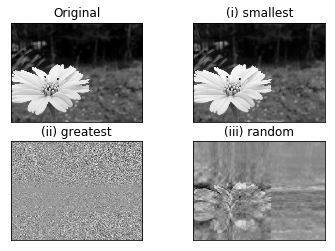

In [76]:
###############################################
## SHOW THE FIGURES
print('The image is {:d}x{:d}\n - it has {:d} singular values between {:.3f} and {:.3f}'.format( img_gray.shape[0], img_gray.shape[1]  , len(s)  ,  np.min(s) , np.max(s) ))
print(' - {:.1f}% of the singular values are set to zero ({:d}/{:d})'.format(Compression ,  int(nb_to_zero) ,  len(s)   ))

plt.figure()# new figure

plt.subplot(2,2,1)
plt.xticks([]),plt.yticks([])
plt.title("Original")
plt.imshow(img_gray, cmap = cm.Greys_r) 

plt.subplot(2,2,2)
plt.xticks([]),plt.yticks([])
plt.title("(i) smallest")
plt.imshow(img_i, cmap = cm.Greys_r) 

plt.subplot(2,2,3)
plt.xticks([]),plt.yticks([])
plt.title("(ii) greatest")
plt.imshow(img_ii, cmap = cm.Greys_r) 

plt.subplot(2,2,4)
plt.xticks([]),plt.yticks([])
plt.title("(iii) random")
plt.imshow(img_iii, cmap = cm.Greys_r) 

plt.show() #show the window
###############################################

# high signature values contain more information!!!

<div class="exo"> <b>Question 2:</b> Compute the sum of the singular values for the original image and the three modified images. What can you conclude about the visual information provided by the singular values?
</div>

In [77]:
print(np.sum(s), np.sum(s_i), np.sum(s_ii), np.sum(s_iii))

489.467 466.232 1.61847 120.779


## <a id="MAPG"> c) PageRank and the Power Method</a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>




In this part, we will compute the PageRank ordering of the following graph.


<img src="img/graph.png" alt="graph" style="width: 50%;"/>


In PageRank, the score $x_i$ of page $i$ is equal to the sum over the pages $j$ pointing toward $i$ of their scores $x_j$  divided by their number of outgoing links $n_j$. This leads to a ranking matrix $R$ defined from the scoring method as
$$ x = Rx.$$

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### Graph matrix
A = np.array([[0,1,1,0,1],[0,0,0,1,1],[1,0,0,1,0],[0,0,1,0,1],[0,1,0,0,0]])
####

<div class="exo"> <b>Question 1:</b> Explain how the ranking matrix $R$ is generated from adjacence matrix $A$ and that that the sums of its columns are equal to $1$. 
</div>

In [88]:
#  column stochatic normalization 
R = np.dot( A  , np.diag(1.0/np.sum(A,0)) ) 
R

array([[ 0.        ,  0.5       ,  0.5       ,  0.        ,  0.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.5       ,  0.33333333],
       [ 1.        ,  0.        ,  0.        ,  0.5       ,  0.        ],
       [ 0.        ,  0.        ,  0.5       ,  0.        ,  0.33333333],
       [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.        ]])

<div class="exo"> <b>Question 2:</b> Check numerically that $\|R\| = 1$ for some matrix norm and that the spectral radius of $R$ is equal to $1$. 
</div>

In [101]:
# np.linalg.norm?
norm1 = np.linalg.norm(R, ord=1)
norm2 = np.linalg.norm(R, ord=2)
normf = np.linalg.norm(R, ord=math.inf)
print(norm1, norm2, normf)

eigvals, eigvecs = np.linalg.eig(R)
print(eigvals, max(abs(eigvals)))
print(eigvecs)

sp_rad = max(abs(eigvals))
print("Spectral radius: {:f}".format( sp_rad ) )

1.0 1.14867367118 1.5
[ -9.08248290e-01 +0.00000000e+00j   1.00000000e+00 +0.00000000e+00j
  -9.17517095e-02 +0.00000000e+00j   6.30743774e-17 +9.73348989e-09j
   6.30743774e-17 -9.73348989e-09j] 1.0
[[  4.93803347e-01 +0.00000000e+00j  -5.14674929e-01 +0.00000000e+00j
   -2.68230737e-01 +0.00000000e+00j  -2.35702260e-01 +4.58841114e-09j
   -2.35702260e-01 -4.58841114e-09j]
 [ -2.46901673e-01 +0.00000000e+00j  -2.37542275e-01 +0.00000000e+00j
    1.34115369e-01 +0.00000000e+00j   5.96659295e-16 -1.37652334e-08j
    5.96659295e-16 +1.37652334e-08j]
 [ -7.40705020e-01 +0.00000000e+00j  -7.12626824e-01 +0.00000000e+00j
    4.02346106e-01 +0.00000000e+00j   4.71404521e-01 +9.17682228e-09j
    4.71404521e-01 -9.17682228e-09j]
 [  3.57881443e-01 +0.00000000e+00j  -3.95903791e-01 +0.00000000e+00j
    4.62629588e-01 +0.00000000e+00j   4.71404521e-01 +2.18358725e-25j
    4.71404521e-01 -2.18358725e-25j]
 [  1.35921904e-01 +0.00000000e+00j  -1.18771137e-01 +0.00000000e+00j
   -7.30860325e-01 +0.

<div class="exo"> <b>Question 3:</b> Iterate the matrix $R$ a large number of times and check if the matrix is primitive. What do you notice on the eigenvalues and eigenvectors? How is defined the rank 1 matrix that you obtain? This manner of computing eigenvectors/values is called the *power method*.
</div>

In [111]:
k = 200
# R_pow = 0 #.........................................
# eig_val_pow,eig_vec_pow = 0,0 #.........................................

R_pow = np.copy(R)
eig_vec_pow = np.random.rand(R.shape[0])
for i in range(k):
    R_pow = np.matmul(R_pow, R)
    eig_vec_pow = np.matmul(R, eig_vec_pow)
    eig_vec_pow = eig_vec_pow / np.linalg.norm(eig_vec_pow)

eig_val_pow = np.matmul(np.matmul(eig_vec_pow, R), eig_vec_pow) / np.dot(eig_vec_pow, eig_vec_pow)

print("R^{0} = {1}".format(k,R_pow))
print(eig_vec_pow)
print("eigenvalues: {0}".format(eig_val_pow))

R^200 = [[ 0.26  0.26  0.26  0.26  0.26]
 [ 0.12  0.12  0.12  0.12  0.12]
 [ 0.36  0.36  0.36  0.36  0.36]
 [ 0.2   0.2   0.2   0.2   0.2 ]
 [ 0.06  0.06  0.06  0.06  0.06]]
[ 0.51467493  0.23754227  0.71262682  0.39590379  0.11877114]
eigenvalues: 0.9999999995954294


<div class="exo"> <b>Question 4:</b> Recover the *Perron* eigenvector of matrix $R$. The entries of this vector are the PageRank scores of the nodes/pages of the graph. Give the PageRank ordering of the pages of the graph.
</div>

In [ ]:
v = 0 #......................................... 
#print("Perron vector: {0}".format(v))

<div class="exo"> <b>Question 5: (to go further)</b> In this exercise, the graph we took led to a *primitive* matrix as seen above; this is necessary for the power method to work as the eigenvalue $1$ has to be the only one of modulus $1$. This is actually the case when the graph is strongly connected, that is when you can go from any node to any other node by following the edges, with *enough* loops. When it is not the case, our problem becomes ill posed. To overcome this problem, the ranking matrix $R$  is replaced by 
$$ M = (1-\alpha) R + \alpha J, ~~~~~~~~ \alpha\in]0,1[ $$
where is $J$ is the $5\times 5$ matrix whose entries are all $1/5$. The value of $\alpha$ originally used by Google is $0.15$.
</div>

*  
  *  
     *  Show that $M$ is column-stochastic provided that $R$ is.
     *  Show that the problem is now well-posed.
     *  Compute the ranking for the original graph but where the link from $2$ to $5$ is suppressed.

In [ ]:
#### New Graph matrix
A_2 = np.array([[0,1,1,0,1],[0,0,0,1,1],[1,0,0,1,0],[0,0,1,0,1],[0,0,0,0,0]])
####

---
<div id="style"></div>
### Package Check and Styling


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


In [ ]:
import lib.notebook_setting as nbs

packageList = ['IPython', 'numpy', 'scipy', 'matplotlib', 'cvxopt']
nbs.packageCheck(packageList)

nbs.cssStyling()